Comenzamos corriendo simpy

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

# Una nota sobre ecuaciones

Las ecuaciones no estan representadas por un "=" o "==" , sino por la funcion Eq(x,y) 

In [2]:
Eq(x,y)

Podemos aplicar un truco . En **sympy** cualquier funcion que no este dentro de Eq() se asume como cero . Y debido a que $a=b \Leftrightarrow a-b=0$ .Entonces podemos hacer lo siguiente

In [3]:
solveset(Eq(x**2,1), x) # Te da el conjunto solucion

In [4]:
solveset(Eq(x**2-1,0),x) # igual pero escrito de otra forma

In [5]:
solveset(x**2-1,x) # igual pero mas simplificado

# Resolver Ecuaciones algebraicamente

La sintaxis de **solveset** es **solveset(equation, variable=None, domain = S.Complexes)** .  Hay otra funcion llamada **solve** con sintaxis **solve(equation, variable)** pero se prefiere que uses **solveset**. 

**solveset** te puede regresar distintas soluciones . (**FiniteSet** , **Interval** , **ImageSet** ) 

In [6]:
solveset(x**2-x,x) # devuelve un conjunto finito FiniteSet

In [7]:
solveset(x-x,x , domain=S.Reals) # devuelve ImageSet

In [8]:
solveset(sin(x)-1, x , domain=S.Reals) # devueve un Interval

In [9]:
solveset(exp(x),x) # devuelve el conjuntoo vacio 

In [10]:
# no encuentra soluciones asi que devuelve algo redundante
solveset( cos(x)-x , x) 

# Resolver sistemas de ecuaciones lineales

Ahora para sistemas de ecuaciones lineales podemos usar **linsolve** que su sintaxis no es tan complicada si vez ejemplos 

## Primera Forma

In [11]:
linsolve([x+y+z-1, x+y+2*z-3],(x,y,z))

## Segunda Forma

In [12]:
M = Matrix(([1,1,1,1],[1,1,2,3]))
M

⎡1  1  1  1⎤
⎢          ⎥
⎣1  1  2  3⎦

In [13]:
linsolve(M , (x,y,z))

# Tercera Forma

In [14]:
M = Matrix(([1,1,1,1],[1,1,2,3]))
'''
Lo siguiente que haremos sera estos 3 lineas en 1
A = M[:,:-1]
b = M[:,-1] 
system = A,b 
'''
system = A, b = M[:,:-1], M[:,-1]  # divide como el sistema de eucaciones (entiendelo)
system

⎛⎡1  1  1⎤  ⎡1⎤⎞
⎜⎢       ⎥, ⎢ ⎥⎟
⎝⎣1  1  2⎦  ⎣3⎦⎠

In [15]:
linsolve(system, x, y , z)

### OjO . el orden de la solución corresponde al orden de los símbolos dados 

# Resolver sistemas ecuaciones no lineales

Para resolver estos tipos de ecuacones usamos **nonlinsolve** . 

### Cuando hay solucion real 

In [16]:
 # es para indicar que estoy usando variables tipo real 
a, b, c, d = symbols('a, b , c, d', real=True)
# se puede pasar tambien en vez de a, b . [a,b]
nonlinsolve([a**2+a, a-b], a,b) # la salida es el conjunto solucion
# se puede pasar tambien en vez de a, b . [a,b]
# nonlinsolve([a**2+a, a-b], [a,b])

In [17]:
nonlinsolve([x*y-1,x-2], x, y) # segunda forma de pasar argumentos

### Cuando solo hay solucion compleja

In [18]:
nonlinsolve([x**2+1, y**2+1],[x,y])

### Cuando hay tanto solucion real como la compleja 

In [19]:
from sympy import sqrt
system = [x**2-2*y**2-2,x*y-2] # definiendo el sistema
vars = [x,y] # las variables
# una nueva forma comoda de resolver ecuaciones 
nonlinsolve(system,vars)

In [20]:
# algo mas complicado 
system = [exp(x)-sin(y), 1/y-3]
nonlinsolve(system, vars)

### Cuando el sistema tiene muchas soluciones

In [21]:
nonlinsolve([a**2+ a*c, a-b],[a,b])

# Notas impotante a tener a consideracion al usar funciones para resolver ecuaciones particulares 
- El orden de la solucion corersponde al orden de los simbolos dados por ejemplo das [x,y,z] entonces la solucion te da en ese orden

Actualmente **nonlinsolve** no es capaz de resolver adecuadamente sistemas de ecuaciones que tienen funciones trigonometricas . Si se da esos casos podrias usar **solve** 

In [22]:
solve([sin(x+y), cos(x-y)], [x,y])

**solveset** informa cada solucion una vez . Es decir se come soluciones repetidas . Para polinomio convendria usar **roots**

In [23]:
solveset(x**3 - 6*x**2 + 9*x, x)

In [24]:
roots(x**3 -6*x**2 +9*x, x)

La salida significa que se tiene el 0 de multiplicidad 1 y 3 de multiplicidad 2 . 

# Resolviendo Ecuaciones Diferenciales

Para resolver Ecuaciones Diferenciales se usa **dsolve** . Pero primero se hace lo siguinete

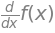

In [25]:
# le dices que f, g seran un tipo especial de simbolo
f,g = symbols('f g', cls=Function)
# luego hacemos las derivadas los definitmos asi 
f(x).diff(x) # Seria bueno que te fijes la salida de esto 

Ahora procedemos a armar la siguiente ecuacion diferencial

$$f''(x)-2f'(x)+f(x)=sin(x)$$

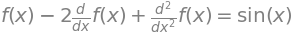

In [26]:
diffeq = Eq(f(x).diff(x,x)-2*f(x).diff(x)+f(x), sin(x))
diffeq # estamos armando, aun no  resolvemos 

In [27]:
# resolvemos
dsolve(diffeq,f(x))

Hay que tener en mente que **dsolve** regresa una Eq . Esto se debe a que las ecuaciones diferenciales en general no se pueden resolver explicitamente con la funcion . Para que entiendas esto te muestro la siguiente salida

In [28]:
dsolve(f(x).diff(x)*(1-sin(f(x)))-1, f(x))

Las constantes son de la forma **$C_1,C_2,C_3$** y asi sucesivamente